In [3]:
#import packages
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO

In [4]:
df = pd.read_csv('tel_churn.csv')
df.head()

,Unnamed: 0,seniorcitizen,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,65.6,593.30,0,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
1,1,0,59.9,542.40,0,False,True,True,False,True,...,False,True,False,False,True,False,False,False,False,False
2,2,0,73.9,280.85,1,False,True,True,False,True,...,True,True,False,False,True,False,False,False,False,False
3,3,1,98.0,1237.85,1,False,True,False,True,True,...,True,True,False,False,False,True,False,False,False,False
4,4,1,83.9,267.40,1,True,False,False,True,True,...,False,False,False,True,True,False,False,False,False,False


In [5]:
df  = df.drop("Unnamed: 0", axis=1)

In [6]:
# We create our feature columns
x = df.drop('churn', axis=1)
x.head()

,seniorcitizen,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,contract_Month-to-month,...,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,65.6,593.30,True,False,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
1,0,59.9,542.40,False,True,True,False,True,False,True,...,False,True,False,False,True,False,False,False,False,False
2,0,73.9,280.85,False,True,True,False,True,False,True,...,True,True,False,False,True,False,False,False,False,False
3,1,98.0,1237.85,False,True,False,True,True,False,True,...,True,True,False,False,False,True,False,False,False,False
4,1,83.9,267.40,True,False,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False


In [7]:
# create our target column
y = df['churn']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: churn, dtype: int64

In [8]:
# splitting data set 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
# create our model
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [10]:
# fit our model
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [11]:
# predict the model
y_pred = model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [12]:
# check our model accuracy
model_dt.score(x_test, y_test)

0.7953091684434968

In [13]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.53      0.58       371

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [14]:
# our accuracy is low, so we will use SMOTETomek to balance our data
smt = SMOTEENN()
X_resampled, y_resampled = smt.fit_resample(x, y)

In [15]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [16]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [17]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.926271186440678
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       507
           1       0.93      0.94      0.94       673

    accuracy                           0.93      1180
   macro avg       0.93      0.92      0.92      1180
weighted avg       0.93      0.93      0.93      1180



In [18]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[460  47]
 [ 40 633]]


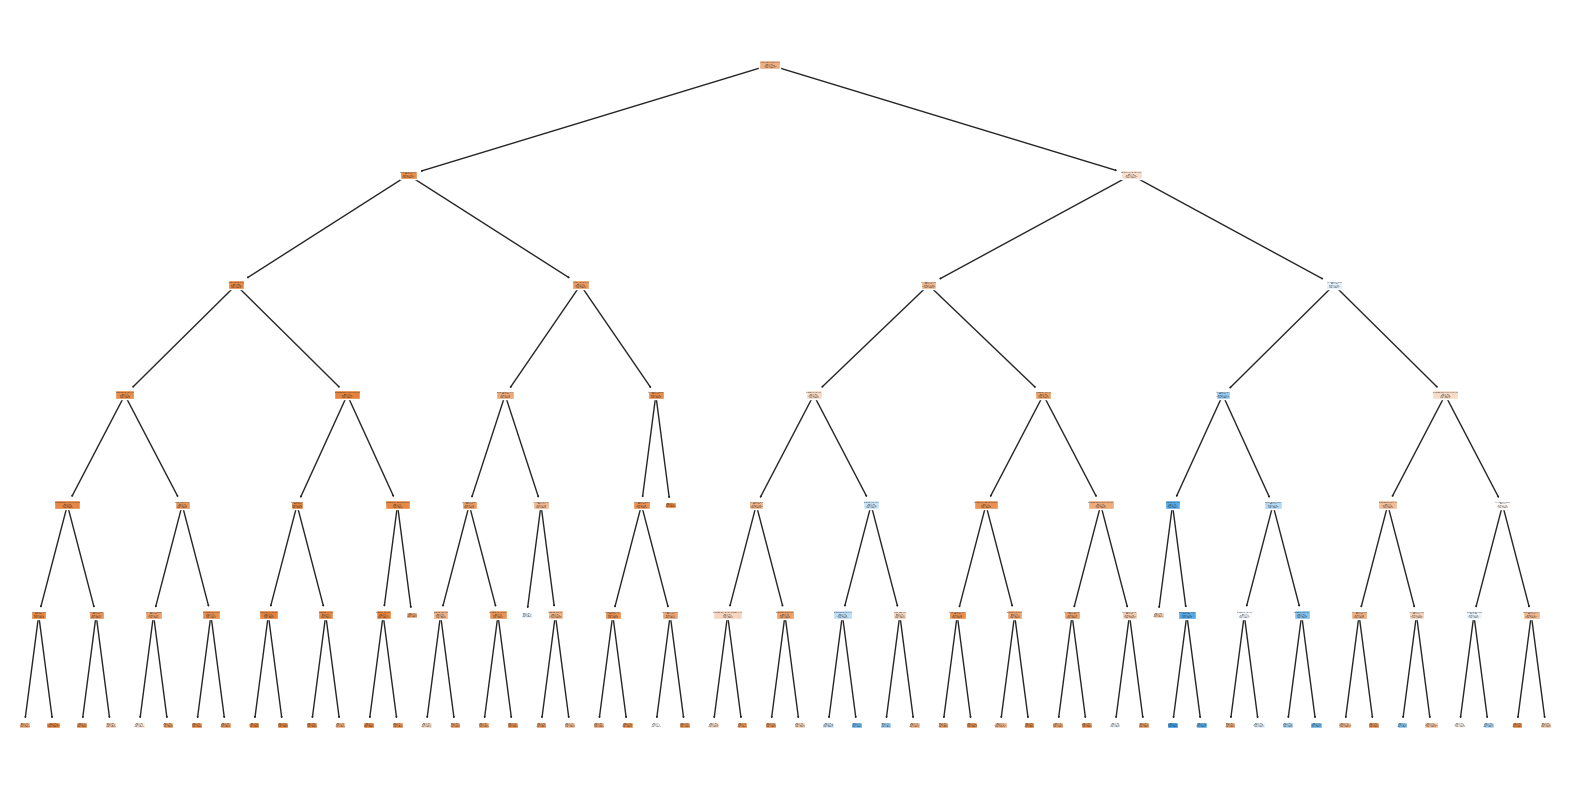

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(model_dt, filled=True, feature_names=x_train.columns, class_names=['Class 0', 'Class 1'])
plt.show()

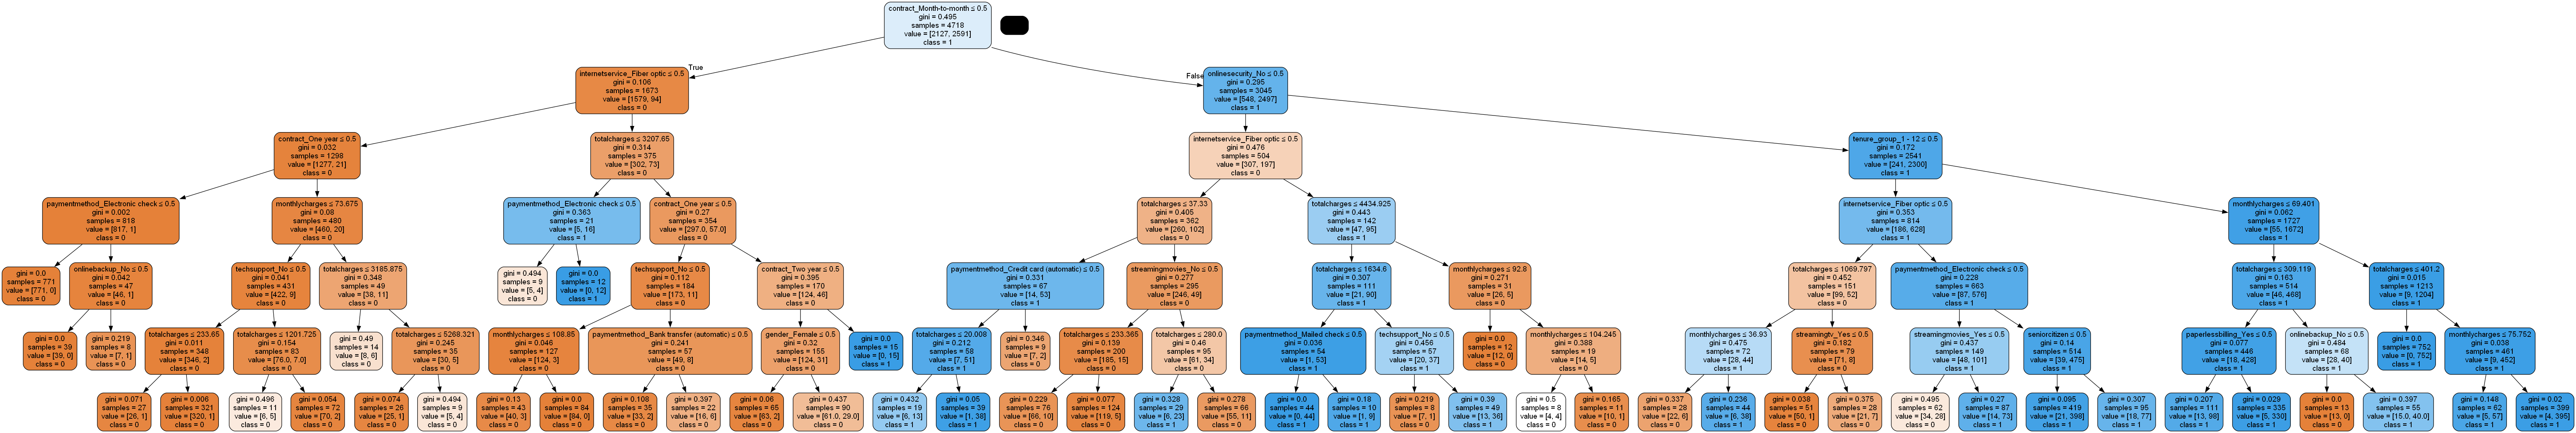

In [20]:
dot_data = StringIO()

# Export the decision tree to a dot format
export_graphviz(model_dt_smote, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = xr_test.columns, class_names=['0', '1'])

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Write the graph to a png file
graph.write_png('model_visualization.png')

# Display the image
Image(graph.create_png())

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [22]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [23]:
y_pred=model_rf.predict(x_test)

In [24]:
model_rf.score(x_test,y_test)

0.8073916133617626

In [25]:
print(classification_report(y_test, y_pred, labels=[False,True]))

              precision    recall  f1-score   support

       False       0.83      0.92      0.88      1036
        True       0.69      0.49      0.57       371

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [26]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x, y)

In [27]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [28]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [29]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [30]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [31]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)

0.9178785286569717


In [32]:
print(confusion_matrix(yr_test1, yr_predict1))

[[464  60]
 [ 36 609]]


In [33]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [34]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [35]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [36]:
RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [37]:
yr_predict_pca = model.predict(xr_test_pca)

In [38]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [39]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7074422583404619
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       524
           1       0.72      0.78      0.75       645

    accuracy                           0.71      1169
   macro avg       0.71      0.70      0.70      1169
weighted avg       0.71      0.71      0.71      1169



In [40]:
import pickle

In [41]:
filename = "model.sav"

In [42]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [43]:
loaded_model = pickle.load(open(filename, 'rb'))

In [44]:
model_score_r1 = loaded_model.score(xr_test1, yr_test1)

In [45]:
model_score_r1

0.9178785286569717